In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from tqdm import tqdm
import os

In [10]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [11]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.Grayscale(num_output_channels=3),  # DenseNet expects 3 channels
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

In [12]:
train_data = ImageFolder("/kaggle/input/balanced-chest-xray/balanced/train", transform=transform)
val_data = ImageFolder("/kaggle/input/balanced-chest-xray/balanced/val", transform=transform)
test_data = ImageFolder("/kaggle/input/balanced-chest-xray/balanced/test", transform=transform)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_loader = DataLoader(val_data, batch_size=32)
test_loader = DataLoader(test_data, batch_size=32)

In [13]:
model = models.densenet121(pretrained=True)
model.classifier = nn.Linear(model.classifier.in_features, 1)  # Binary classification
model = model.to(device)

In [14]:
criterion = nn.BCEWithLogitsLoss()  # For binary classification
optimizer = optim.Adam(model.parameters(), lr=1e-4)

In [15]:
import time

In [16]:
num_epochs = 30

In [17]:
for epoch in range(num_epochs):
    model.train()
    running_loss = 0
    start_time = time.time()

    for images, labels in tqdm(train_loader):
        images, labels = images.to(device), labels.to(device).float().unsqueeze(1)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    epoch_time = time.time() - start_time
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}, Time: {epoch_time:.2f}s")

100%|██████████| 242/242 [02:56<00:00,  1.37it/s]


Epoch [1/30], Loss: 0.0790, Time: 176.50s


100%|██████████| 242/242 [02:54<00:00,  1.39it/s]


Epoch [2/30], Loss: 0.0267, Time: 174.48s


100%|██████████| 242/242 [02:35<00:00,  1.55it/s]


Epoch [3/30], Loss: 0.0096, Time: 155.79s


100%|██████████| 242/242 [02:15<00:00,  1.79it/s]


Epoch [4/30], Loss: 0.0151, Time: 135.09s


100%|██████████| 242/242 [02:13<00:00,  1.81it/s]


Epoch [5/30], Loss: 0.0144, Time: 133.34s


100%|██████████| 242/242 [02:11<00:00,  1.83it/s]


Epoch [6/30], Loss: 0.0060, Time: 131.93s


100%|██████████| 242/242 [02:09<00:00,  1.87it/s]


Epoch [7/30], Loss: 0.0130, Time: 129.33s


100%|██████████| 242/242 [02:07<00:00,  1.89it/s]


Epoch [8/30], Loss: 0.0170, Time: 127.79s


100%|██████████| 242/242 [02:07<00:00,  1.89it/s]


Epoch [9/30], Loss: 0.0025, Time: 127.93s


100%|██████████| 242/242 [02:06<00:00,  1.91it/s]


Epoch [10/30], Loss: 0.0007, Time: 126.92s


100%|██████████| 242/242 [02:08<00:00,  1.89it/s]


Epoch [11/30], Loss: 0.0003, Time: 128.05s


100%|██████████| 242/242 [02:07<00:00,  1.90it/s]


Epoch [12/30], Loss: 0.0004, Time: 127.56s


100%|██████████| 242/242 [02:07<00:00,  1.90it/s]


Epoch [13/30], Loss: 0.0002, Time: 127.56s


100%|██████████| 242/242 [02:07<00:00,  1.89it/s]


Epoch [14/30], Loss: 0.0002, Time: 127.95s


100%|██████████| 242/242 [02:08<00:00,  1.89it/s]


Epoch [15/30], Loss: 0.0002, Time: 128.37s


100%|██████████| 242/242 [02:08<00:00,  1.89it/s]


Epoch [16/30], Loss: 0.0001, Time: 128.32s


100%|██████████| 242/242 [02:08<00:00,  1.89it/s]


Epoch [17/30], Loss: 0.0001, Time: 128.09s


100%|██████████| 242/242 [02:08<00:00,  1.88it/s]


Epoch [18/30], Loss: 0.0001, Time: 128.54s


100%|██████████| 242/242 [02:08<00:00,  1.88it/s]


Epoch [19/30], Loss: 0.0001, Time: 128.83s


100%|██████████| 242/242 [02:09<00:00,  1.87it/s]


Epoch [20/30], Loss: 0.0003, Time: 129.19s


100%|██████████| 242/242 [02:09<00:00,  1.87it/s]


Epoch [21/30], Loss: 0.0207, Time: 129.18s


100%|██████████| 242/242 [02:09<00:00,  1.88it/s]


Epoch [22/30], Loss: 0.0071, Time: 129.04s


100%|██████████| 242/242 [02:08<00:00,  1.89it/s]


Epoch [23/30], Loss: 0.0032, Time: 128.25s


100%|██████████| 242/242 [02:08<00:00,  1.88it/s]


Epoch [24/30], Loss: 0.0007, Time: 128.95s


100%|██████████| 242/242 [02:08<00:00,  1.89it/s]


Epoch [25/30], Loss: 0.0002, Time: 128.30s


100%|██████████| 242/242 [02:07<00:00,  1.89it/s]


Epoch [26/30], Loss: 0.0001, Time: 127.94s


100%|██████████| 242/242 [02:08<00:00,  1.89it/s]


Epoch [27/30], Loss: 0.0001, Time: 128.30s


100%|██████████| 242/242 [02:07<00:00,  1.90it/s]


Epoch [28/30], Loss: 0.0117, Time: 127.68s


100%|██████████| 242/242 [02:09<00:00,  1.87it/s]


Epoch [29/30], Loss: 0.0190, Time: 129.29s


100%|██████████| 242/242 [02:09<00:00,  1.86it/s]

Epoch [30/30], Loss: 0.0017, Time: 130.00s


In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [24]:
model.eval()
all_labels = []
all_preds = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        outputs = model(images)
        preds = torch.sigmoid(outputs).cpu().numpy()
        all_preds.extend(preds)
        all_labels.extend(labels.numpy())

# Binarize predictions with threshold 0.5
all_preds_bin = [1 if p >= 0.5 else 0 for p in all_preds]

# Metrics
accuracy = accuracy_score(all_labels, all_preds_bin)
precision = precision_score(all_labels, all_preds_bin)
recall = recall_score(all_labels, all_preds_bin)
f1 = f1_score(all_labels, all_preds_bin)
roc_auc = roc_auc_score(all_labels, all_preds)

print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(f"ROC-AUC:   {roc_auc:.4f}")

Accuracy:  0.7933
Precision: 0.7514
Recall:    1.0000
F1 Score:  0.8581
ROC-AUC:   0.9542


In [25]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

In [26]:
fpr, tpr, thresholds = roc_curve(all_labels, all_preds)
roc_auc = auc(fpr, tpr)

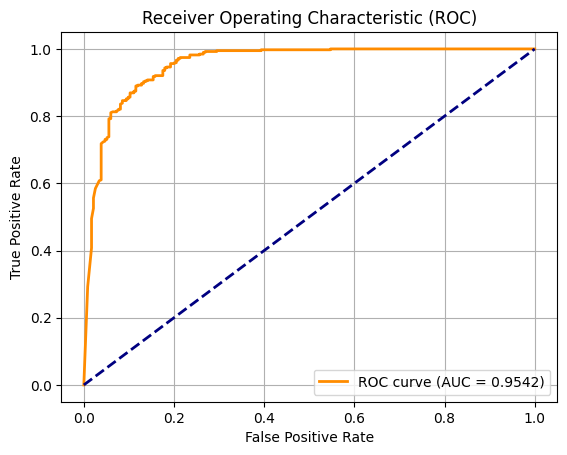

In [27]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid()
plt.show()